In [8]:
from imageVAE import *
from dataset_helper import *
import os
import matplotlib.pyplot as plt

In [2]:
vae = ImageVAE((128,128,3),[16,32],[32,16])

(128, 128, 3)
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 432         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 4608        conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 524288)       0           conv2d_1[0][0]                   
______________________________________________________________________________

In [50]:
vae.load_weights("../models/abstract_vae")

In [49]:
names = ["../data/abstract_images/" + x for x in os.listdir("../data/abstract_images/") if ".jpg" in x][:1000]

In [6]:
tensor = getTrainingTensor(names)

tensor = tensor.astype("float32") / 255

In [51]:
latentReg = vae.encoder.predict(tensor)

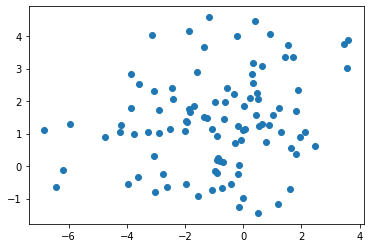

In [52]:
plt.scatter(latentReg[0][:,0],latentReg[0][:,1])


In [53]:
image = vae.decoder.predict(np.array([[5,10]]))[0]

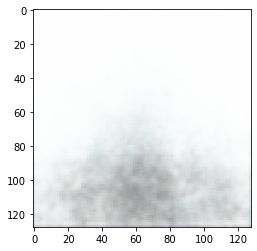

In [54]:
plt.imshow(image)

([], <a list of 0 Text yticklabel objects>)

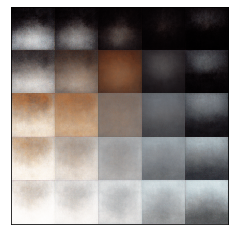

In [55]:
n = 5
digit_size = 128
figure = np.zeros((digit_size * n, digit_size * n,3))
# linearly spaced coordinates corresponding to the 2D plot
# of digit classes in the latent space
grid_x = np.linspace(min(latentReg[0][:,0]), max(latentReg[0][:,0]), n)
grid_y = np.linspace(min(latentReg[0][:,1]), max(latentReg[0][:,1]), n)

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.decoder.predict(z_sample)[0]

        #digit = x_decoded[0].reshape(digit_size, digit_size, 3)
        figure[
            i * digit_size : (i + 1) * digit_size,
            j * digit_size : (j + 1) * digit_size,
            :
        ] = x_decoded

plt.imshow(figure)
plt.xticks([])
plt.yticks([])

In [56]:
figure = figure * 255

In [57]:
Image.fromarray(figure.astype(np.uint8)).save("../data/generated_abstract_images/abstract_collection2.jpg")
